Grupo 8

# Desafío de análisis bivariado y multivariado

**Consigna**: Realizar un pequeño análisis Bivariado y multivariado de datos, teniendo en cuenta las características de las observaciones. Generar al menos 3 gráficos asociados a cada tipo de análisis.


### Librerías



In [ ]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Importación de datos

In [ ]:
drugs_df = pd.read_csv('drug200.csv')

### Exploración del df

In [ ]:
drugs_df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [ ]:
drugs_df.shape

(200, 6)

In [ ]:
#chequeamos el tipo de dato del df, dado que ello impactará en el tipo de análisis que podremos aplicar

drugs_df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

## Age y Drug

Variable numérica y variable categórica

En principio realizaremos un análisis bivariado entre **Age** (variable numérica) y **Drug** (variable categórica):

In [ ]:
#veamos un resumen estadístico de la variable edad

drugs_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


Se observa que la media es de 44 años, el valor máximo es de 74, mientras que el valor mínimo es de 15 años.

In [ ]:
#descripción de variable drug

pd.value_counts(drugs_df['Drug'])

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

Vemos que hay 5 tipo de drogas. 

Gráfico 1: Conociendo la distribución de cada variable, podemos indagar su relación mediante un boxplot por cada categoría de droga:

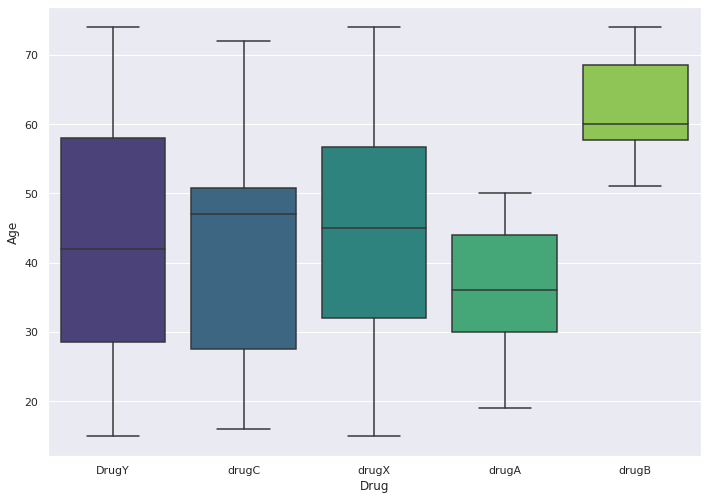

In [ ]:
sns.boxplot(x= drugs_df['Drug'], y= drugs_df['Age'], palette = 'viridis')
sns.set(rc={'figure.figsize':(15,15)})
plt.show()

Se observa que quienes consumen la droga B registran las edades más avanzadas. Además, en el caso de la droga A hay una mayor concentración de edades. 

Gráfico 2: También podemos indagar gráficamente la relación mediante el gráfico de violín: 

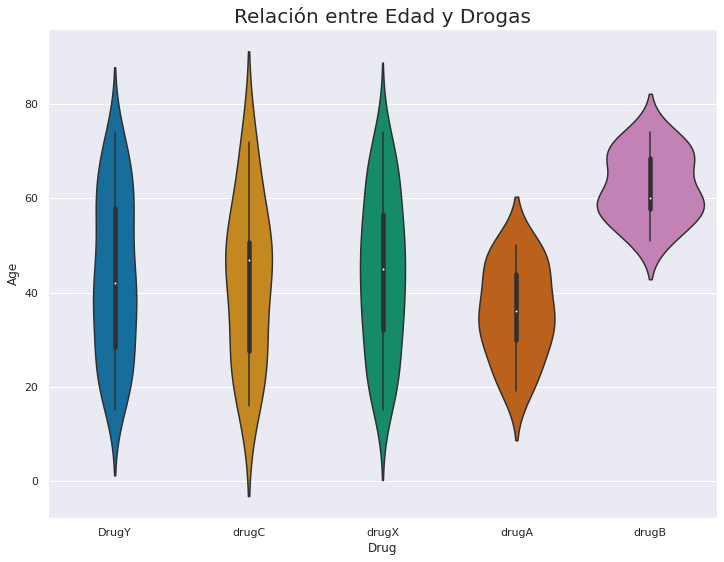

In [ ]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(x = drugs_df['Drug'], y = drugs_df['Age'], palette = 'colorblind')
plt.title('Relación entre Edad y Drogas', fontsize = 20, fontweight = 30)
plt.show()

Gráfico 3: Finalmente, podemos indagar la relación mediante un gráfico de barras:

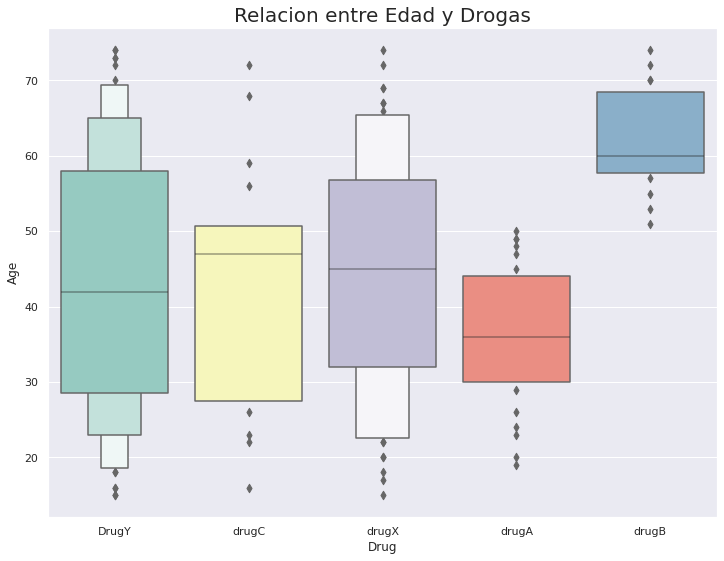

In [ ]:
sns.boxenplot(x = drugs_df['Drug'], y = drugs_df['Age'], palette = 'Set3')
plt.title('Relacion entre Edad y Drogas', fontsize = 20, fontweight = 30)
plt.show()

En este último gráfico resulta interesante observar los valores atípicos y los valores por fuera de los umbrales (outliers). 

## Age y NA_to_ka: 

Asociación entre dos variables numéricas

Por otro lado, podemos realizar un análisis bivariado entre dos variables numéricas como **edad** y **proporción de sodio sobre potasio en sangre**:

In [ ]:
#exploremos previamente la distribución de Na_to_k: 

drugs_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


Se observa que el valor máximo es de 38, mientras que el valor mínimo es 6 en el caso del sodio sobre el potasio en sangre. 

Gráfico 1: Se analiza la asociación entre las variables mediante el análisis de su correlación en un mapa de calor: 

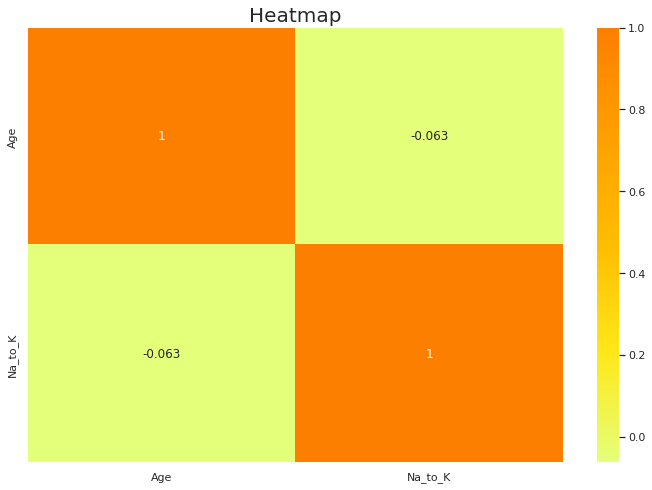

In [ ]:
plt.figure(figsize=(12, 8))

#mapa de calor de matriz de correlación
plt.rcParams['figure.figsize'] = (20, 15)
sns.heatmap(drugs_df.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap', fontsize = 20)
plt.show()

Se observa que las variables se encuentran prácticamente no relacionadas, o no registran una fuerte asociación.

Gráfico 2: Diagrama de dispersión

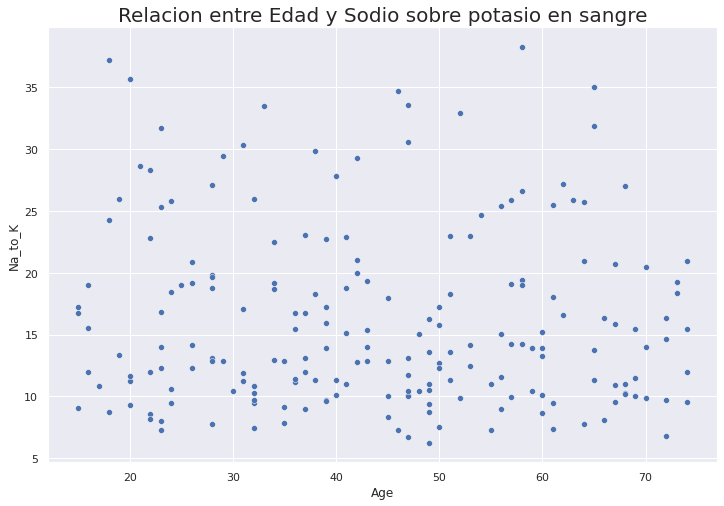

In [ ]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x="Age", y="Na_to_K", data=drugs_df)
plt.title('Relacion entre Edad y Sodio sobre potasio en sangre', fontsize = 20, fontweight = 30)
plt.show()

Con este gráfico también se observa que las variables se encuentran prácticamente no relacionadas, o no registran una fuerte asociación.

Gráfico 3: Otro tipo de matriz de correlación

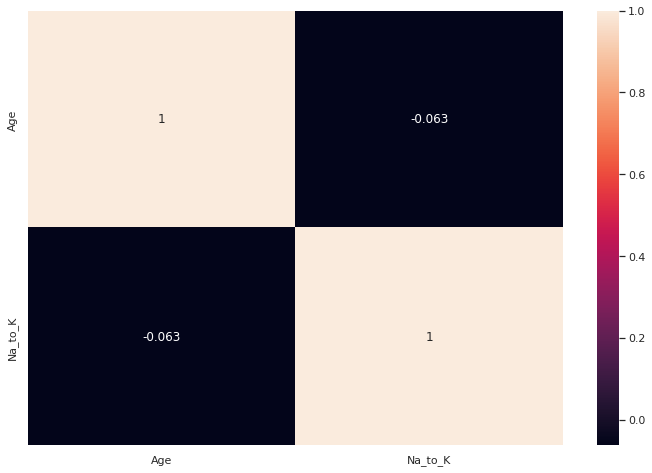

In [ ]:
#Correlaciones
plt.figure(figsize=(12, 8))

dg_corr = drugs_df.corr()
sns.heatmap(dg_corr, 
            xticklabels = dg_corr.columns.values,
            yticklabels = dg_corr.columns.values,
            annot = True);

En los distintos gráficos puede notarse que las variables no se encuentran asociadas.

## Age, Na_to_K y Drugs

Sin embargo, vale la pena indagar la relación de las dos variables numéricas tomando en consideración la participación de la variable categórica drogas: 

Gráfico 1: Gráfico de dispersión entre variables numéricas, distinguiendo los casos según el tipo de droga

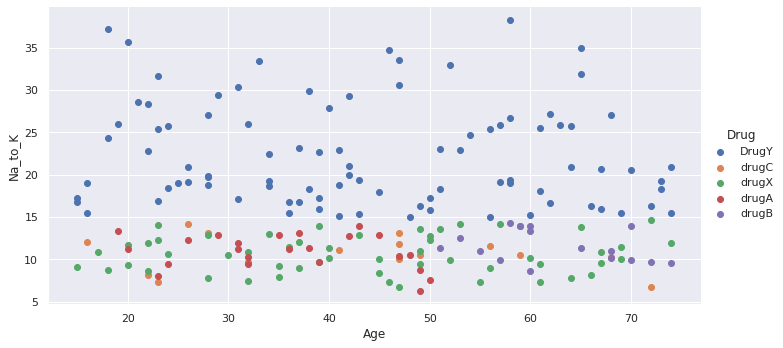

In [ ]:
#FacetGrid 
sns.FacetGrid(drugs_df,hue = 'Drug', height=5, aspect= 2).map(plt.scatter,'Age','Na_to_K').add_legend();
plt.show()


Se observa que la mayor variabilidad se registra en la Droga Y, vienfose mayor concentración de casos en la Droga B respecto a la edad y el potasio según el sodio en sangre. 

Gráfico 2: Pairplot 

<Figure size 1440x960 with 0 Axes>

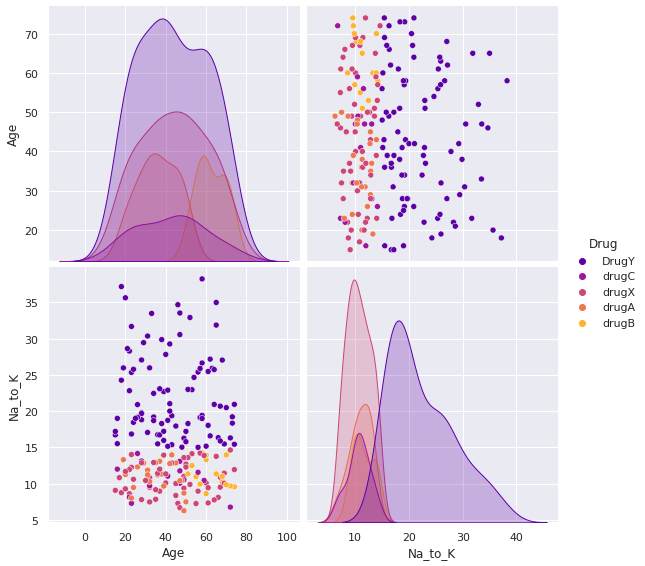

In [ ]:
#Crear un Pairplot del dataset
plt.figure(dpi = 120,figsize= (12,8))
sns.pairplot(drugs_df, hue = 'Drug', palette = 'plasma', height=4, aspect= 1)
plt.show()


Puede notarse que la dispersión de la variable Na_to_K se concentra en los casos de Droga Y, por lo que sería interesante indagar esta relación multivariada dejando a un lado este subsegmento de datos. 

Gráfico 3: Comparatoria dispersión potr droga

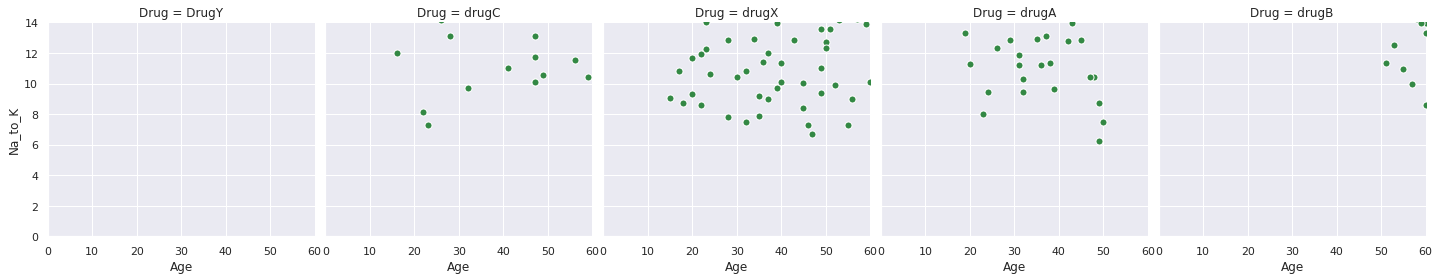

In [ ]:
g = sns.FacetGrid(drugs_df, col="Drug", margin_titles=True, height=4)
g.map(plt.scatter, "Age", "Na_to_K", color="#338844", edgecolor="white", s=50, lw=1)
g.set(xlim=(0, 60), ylim=(0, 14))

Con ningún tipo de droga se observan relaciones significativas entre edad y proporción de sodio en potasio en sangre.